In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
df.dropna(inplace=True)    

In [6]:
df.drop_duplicates(inplace=True)   

In [32]:
df.isnull().sum()

Unnamed: 0           0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
weekday              0
dtype: int64

In [7]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

In [8]:
df['hour'] = df['pickup_datetime'].dt.hour
df['day'] = df['pickup_datetime'].dt.day
df['month'] = df['pickup_datetime'].dt.month
df['year'] = df['pickup_datetime'].dt.year
df['weekday'] = df['pickup_datetime'].dt.weekday

In [9]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2


In [10]:
df = df.drop(['key', 'pickup_datetime'], axis=1)

In [35]:
df

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,weekday
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1,14,20,5,2015,2


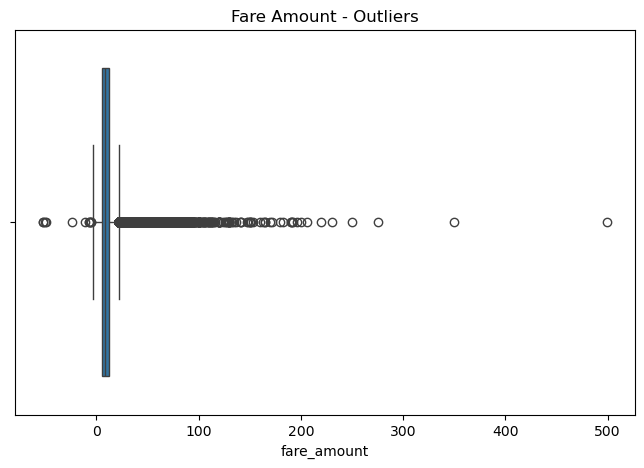

In [12]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['fare_amount'])
plt.title("Fare Amount - Outliers")
plt.show()

In [36]:
df['fare_amount'].describe()

count    195092.000000
mean         11.343792
std           9.697076
min           2.500000
25%           6.000000
50%           8.500000
75%          12.500000
max         196.000000
Name: fare_amount, dtype: float64

In [37]:
df['passenger_count'].describe()

count    195092.000000
mean          1.689787
std           1.305611
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: passenger_count, dtype: float64

In [38]:
df['pickup_latitude'].describe()

count    195092.000000
mean         40.750977
std           0.030143
min          40.002405
25%          40.736455
50%          40.753304
75%          40.767550
max          41.366138
Name: pickup_latitude, dtype: float64

In [13]:
df = df[
    df.fare_amount.between(1, 199) &
    df.passenger_count.between(1, 6) &
    df.pickup_latitude.between(40, 42) &
    df.dropoff_latitude.between(40, 42) &
    df.pickup_longitude.between(-75, -72) &
    df.dropoff_longitude.between(-75, -72)
]

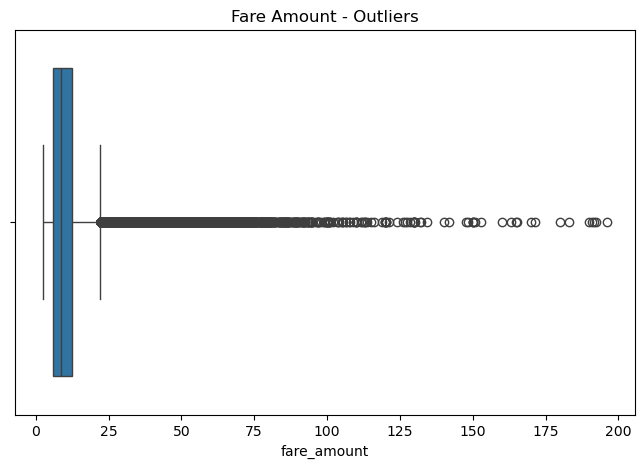

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['fare_amount'])
plt.title("Fare Amount - Outliers")
plt.show()

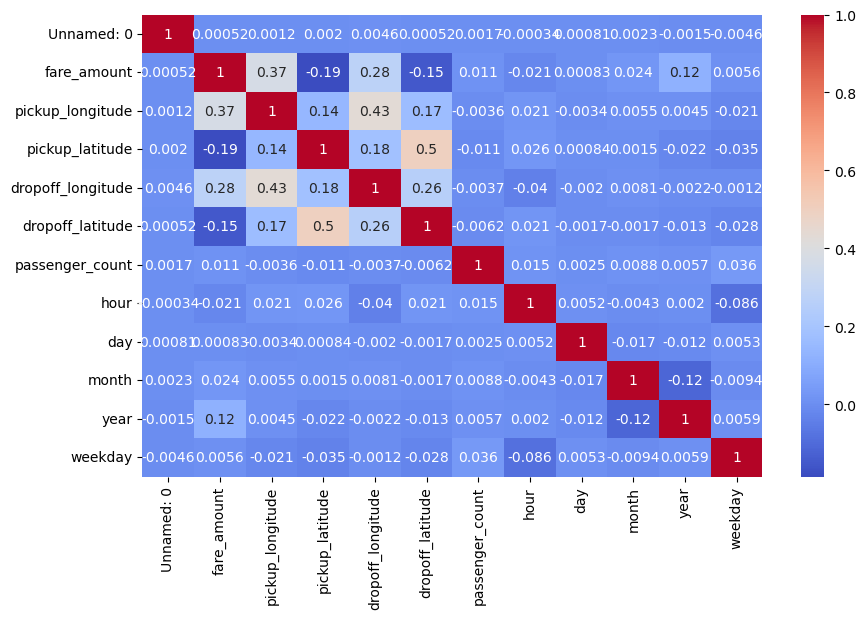

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

In [16]:
X = df.drop('fare_amount', axis=1)
y = df['fare_amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape

(156073, 11)

In [18]:
X_test.shape

(39019, 11)

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred_lr = lr.predict(X_test)

In [21]:
print("Linear Regression Results:")
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Linear Regression Results:
R2 Score: 0.2556179919044599
RMSE: 8.515558117138735


In [28]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [29]:
y_pred_rf = rf.predict(X_test)

In [30]:
print("Random Forest Results:")
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Random Forest Results:
R2 Score: 0.8317877841132967
RMSE: 4.04803211606011


In [31]:
results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R2 Score": [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test, y_pred_rf))]
})
print(results)

               Model  R2 Score      RMSE
0  Linear Regression  0.255618  8.515558
1      Random Forest  0.831788  4.048032
